In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn as sk

In [ ]:
df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df['total'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df2=df[['InvoiceDate', 'total']]

df2.head()

,InvoiceDate,total
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


In [ ]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], format = '%Y/%m/%d')
df2.set_index('InvoiceDate', inplace = True) #set the index to date column
df.sort_index(inplace = True) #reorder by date

df2.head()

C:\Users\AkashAnu Aubeeluck\AppData\Local\Temp\ipykernel_15048\1745773062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], format = '%Y/%m/%d')


,total
InvoiceDate,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


In [ ]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [180]:
train_start = '2010-12-01'
train_end = '2011-09-01'

test_start = '2011-09-02'  # Adjusted test start date, one day after train_end
test_end = '2011-12-09'

forecast_start = '2011-12-10'
forecast_end = '2012-02-01'



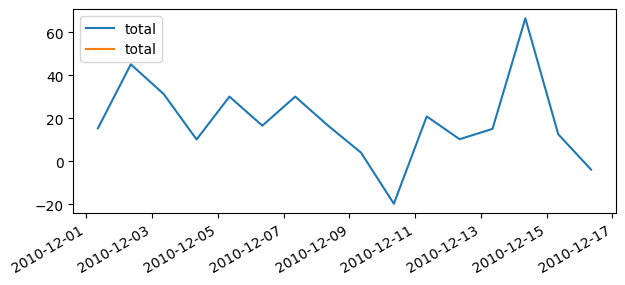

In [179]:
fig, ax = plt.subplots(figsize=(7, 3))
df2.loc[train_start:train_end].plot(ax=ax, label = "Train")
df2.loc[test_start:test_end].plot(ax=ax, label = "Test")
ax.legend()




In [114]:
try:
    from sklearn.tree import DecisionTreeRegressor
    print("DecisionTreeRegressor found! You can use it.")
except ImportError:
    print("DecisionTreeRegressor not found. Please check your scikit-learn installation.")


DecisionTreeRegressor found! You can use it.


In [181]:
from sklearn.tree import DecisionTreeRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Check if the index has a frequency, if not, set it to 'D' (daily)
if df2.index.freq is None:
    df2.index = pd.date_range(start=df2.index[0], periods=len(df2), freq='D')

# Select the target variable (assuming it's in a column named 'target_column')
target_series = df2['total']

# Define the forecaster with reduced lag
forecaster = ForecasterAutoreg(
    # Add the sklearn regressor and reduce lags
    regressor=DecisionTreeRegressor(random_state=28),
    lags=5  # Adjusted lag
)

# Fit the model using train data
forecaster.fit(y=target_series.loc[train_start:train_end])

# Determine the number of steps to forecast
num_steps = len(target_series.loc[train_start:train_end])

# Predict the test period
if num_steps > 0:
    predicted_test = forecaster.predict(steps=num_steps)
else:
    print("Test period is empty or invalid.")


In [177]:
import pmdarima as pm

arima = pm.AutoARIMA(seasonal = False)
arima.fit(df2.loc[train_start:train_end])

# Predict train and test
arima_train = arima.predict_in_sample()
arima_test = arima.predict(n_periods = len(target_series.loc[train_start:train_end]))


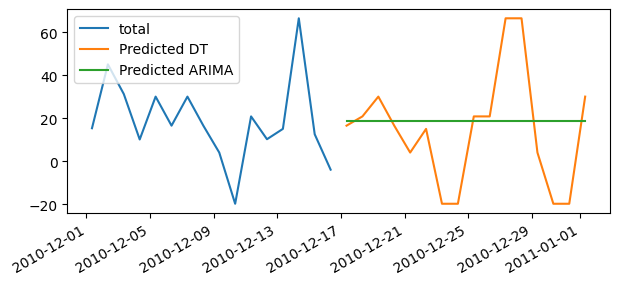

In [178]:
fig, ax = plt.subplots(figsize=(7, 3))
df2.loc[train_start:train_end].plot(ax=ax, label = "Test")
predicted_test.plot(ax=ax, label = 'Predicted DT')
arima_test.plot(ax=ax, label = 'Predicted ARIMA')
ax.legend()